In [1]:
from trainer import *

/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=================[dataset is set to electricity_cat ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[run config is loaded]=================


In [2]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([2.2151], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.1527], device='cuda:0')
epoch 1 -----------------------------------------
tensor([1.5494], device='cuda:0')
epoch 2 -----------------------------------------
tensor([2.1360], device='cuda:0')
epoch 3 -----------------------------------------
tensor([2.3323], device='cuda:0')
epoch 4 -----------------------------------------
done


In [3]:
test_run()

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
tensor([2.2151], device='cuda:0')
epoch 0 -----------------------------------------
tensor([2.1527], device='cuda:0')
epoch 1 -----------------------------------------
tensor([1.5494], device='cuda:0')
epoch 2 -----------------------------------------
tensor([2.1360], device='cuda:0')
epoch 3 -----------------------------------------
tensor([2.3323], device='cuda:0')
epoch 4 -----------------------------------------
done


In [4]:
extractor = get_feature_importance_extractor()
extractor.get()

tensor([-0.6401,  0.5089,  0.0906, -0.0126, -0.2098, -0.1080,  0.1756,  0.1953],
       device='cuda:0', grad_fn=<DivBackward0>)

In [5]:
train_K_fold(get_run_config())

[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
=================[ 1 Fold ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
train_data: torch.Size([23085, 8])
train_label: torch.Size([23085])
validation_data: torch.Size([2564, 8])
validation_label: torch.Size([2564])
test_data: torch.Size([12825, 8])
test_label: torch.Size([12825])
-----------------------------------------


Epoch 1:  96%|█████████▌| 23/24 [00:05<00:00,  4.26it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 250: 100%|██████████| 24/24 [00:07<00:00,  3.26it/s, loss=2.21, acc=0.875, AUC=0.951, val_loss=0.046, val_acc=0.841, val_AUC=0.92]


test_acc: 0.838787853717804
test_auc: 0.9239108671840955
-----------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


=================[ 2 Fold ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
train_data: torch.Size([23085, 8])
train_label: torch.Size([23085])
validation_data: torch.Size([2564, 8])
validation_label: torch.Size([2564])
test_data: torch.Size([12825, 8])
test_label: torch.Size([12825])
-----------------------------------------


Epoch 1:  96%|█████████▌| 23/24 [00:05<00:00,  4.30it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 250: 100%|██████████| 24/24 [00:07<00:00,  3.34it/s, loss=2.37, acc=0.867, AUC=0.945, val_loss=0.066, val_acc=0.792, val_AUC=0.898]


test_acc: 0.8084848523139954
test_auc: 0.9059794834348169
-----------------------------------------


wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


=================[ 3 Fold ]=================
[Tensorflow] Set seed failed,details are: No module named 'tensorflow'
[Pytorch] Seed set successfully
[Pytorch Geometric] Seed set successfully
[Sklearn] Seed set successfully
train_data: torch.Size([23085, 8])
train_label: torch.Size([23085])
validation_data: torch.Size([2565, 8])
validation_label: torch.Size([2565])
test_data: torch.Size([12824, 8])
test_label: torch.Size([12824])
-----------------------------------------


Epoch 1:  96%|█████████▌| 23/24 [00:05<00:00,  4.20it/s]/home/tsou/.conda/envs/pyg/lib/python3.10/site-packages/torcheval/metrics/functional/classification/auroc.py:175: UserWarning: cumsum_cuda_kernel does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at ../aten/src/ATen/Context.cpp:82.)
  return _binary_auroc_compute_jit(input, target, weight)
Epoch 226:  79%|███████▉  | 19/24 [1:28:36<23:19, 279.84s/it]  


KeyboardInterrupt: 

tensor([ 0.1563, -0.2017, -0.7265,  0.0442, -0.0945,  0.0715,  0.0872,  0.0108],
       grad_fn=<ToCopyBackward0>)


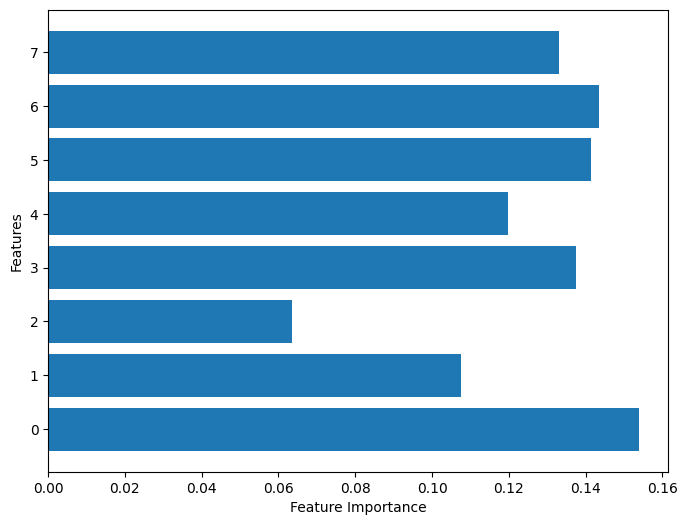

In [ ]:

importance = get_feature_importance_extractor().get().cpu()
print(importance)
importance = importance.softmax(dim=0).detach().numpy()
import matplotlib.pyplot as plt
# 可视化特征重要性
plt.figure(figsize=(8, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()